In [1]:
################################################################################
# Author 1:      Martin Scheffauer
# MatNr 1:       51917931
# Author 2:      Dominik Geschwinde
# MatNr 2:       12108977
# File:          presentation.ipynb

################################################################################
   


In [1]:
from sklearn.model_selection import train_test_split
from dataset import Dataset
from config_reader import ConfigReader

#load in datasets
_config_reader_heart = ConfigReader.read_json_config("./config_heart_disease.json")

datasets = list()
datasets.append(Dataset(_config_reader_heart))

my_random_state = random_state=datasets[0]._random_state_for_split
my_test_size = random_state=datasets[0]._test_size



print("Testing dataset class....\n")

print(f"shape of dataset: {datasets[0]._dataframe.shape}")

print("\nTesting strategy mean...\n")
x_train, y_train, x_test, y_test = datasets[0].split_data("mean")

print("result  --  shape, type of dataset" )
print(f"x_train -- {x_train.shape}, {type(x_train)} ")
print(f"y_train -- {y_train.shape}, {type(y_train)} ")
print(f"x_test -- {x_test.shape}, {type(x_test)} ")
print(f"y_test -- {y_test.shape}, {type(y_test)} ")



print("\nTesting strategy uniform...\n")
x_train, y_train, x_test, y_test = datasets[0].split_data("median")

print("result  --  shape, type of dataset" )
print(f"x_train -- {x_train.shape}, {type(x_train)} ")
print(f"y_train -- {y_train.shape}, {type(y_train)} ")
print(f"x_test -- {x_test.shape}, {type(x_test)} ")
print(f"y_test -- {y_test.shape}, {type(y_test)} ")



print("\nTesting strategy most_frequent...\n")
x_train, y_train, x_test, y_test = datasets[0].split_data("most_frequent")

print("result  --  shape, type of dataset" )
print(f"x_train -- {x_train.shape}, {type(x_train)} ")
print(f"y_train -- {y_train.shape}, {type(y_train)} ")
print(f"x_test -- {x_test.shape}, {type(x_test)} ")
print(f"y_test -- {y_test.shape}, {type(y_test)} ")




print("\nTesting strategy None...\n")
x_train, y_train, x_test, y_test = datasets[0].split_data()

print("result  --  shape, type of dataset" )
print(f"x_train -- {x_train.shape}, {type(x_train)} ")
print(f"y_train -- {y_train.shape}, {type(y_train)} ")
print(f"x_test -- {x_test.shape}, {type(x_test)} ")
print(f"y_test -- {y_test.shape}, {type(y_test)} ")



print("\nTesting invalid strategy...")
x_train, y_train, x_test, y_test = datasets[0].split_data("uniform")


Testing dataset class....

shape of dataset: (920, 14)

Testing strategy mean...

result  --  shape, type of dataset
x_train -- (616, 13), <class 'numpy.ndarray'> 
y_train -- (616,), <class 'numpy.ndarray'> 
x_test -- (304, 13), <class 'numpy.ndarray'> 
y_test -- (304,), <class 'numpy.ndarray'> 

Testing strategy uniform...

result  --  shape, type of dataset
x_train -- (616, 13), <class 'numpy.ndarray'> 
y_train -- (616,), <class 'numpy.ndarray'> 
x_test -- (304, 13), <class 'numpy.ndarray'> 
y_test -- (304,), <class 'numpy.ndarray'> 

Testing strategy most_frequent...

result  --  shape, type of dataset
x_train -- (616, 13), <class 'numpy.ndarray'> 
y_train -- (616,), <class 'numpy.ndarray'> 
x_test -- (304, 13), <class 'numpy.ndarray'> 
y_test -- (304,), <class 'numpy.ndarray'> 

Testing strategy None...

result  --  shape, type of dataset
x_train -- (200, 13), <class 'numpy.ndarray'> 
y_train -- (200,), <class 'numpy.ndarray'> 
x_test -- (99, 13), <class 'numpy.ndarray'> 
y_test --

ValueError: Can only use these strategies: ['mean', 'median', 'most_frequent', 'constant']  got strategy=uniform

In [2]:

from dataset import Dataset
from config_reader import ConfigReader
from sklearn.dummy import DummyClassifier
from simple_baseline_classifier import SimpleBaselineClassifier

#load in datasets
_config_reader_heart = ConfigReader.read_json_config("./config_heart_disease.json")

datasets = list()
datasets.append(Dataset(_config_reader_heart))

my_random_state = random_state=datasets[0]._random_state_for_split
my_test_size = random_state=datasets[0]._test_size


print("Now test SimpleBaselineClassifier class....\n")


x_train, y_train, x_test, y_test = datasets[0].split_data("mean")


print("Testing strategy uniform...\n")

dummy_clf = DummyClassifier(strategy="uniform",random_state =my_random_state,constant = 0)
my_clf = SimpleBaselineClassifier(strategy="uniform",random_state =my_random_state, constant = 0)


print("__repr__:\n")
print(f"{my_clf}\n")

dummy_clf.fit(x_train, y_train)
my_clf.fit(x_train,y_train)


print(f"ref: \n {dummy_clf.predict(x_test)}")
print("\n own:")
print(my_clf.predict(x_test))


print("\nTesting strategy constant...\n")


dummy_clf = DummyClassifier(strategy="constant",random_state =my_random_state,constant = 0)
dummy_clf.fit(x_train, y_train)
my_clf = SimpleBaselineClassifier(strategy="constant",random_state =my_random_state, constant = 0)
my_clf.fit(x_train,y_train)


print("__repr__:\n")
print(f"{my_clf}\n")

print(f"ref: \n {dummy_clf.predict(x_test)}")
print("\n own:")
print(my_clf.predict(x_test))

print("\nTesting strategy most_frequent...\n")

dummy_clf = DummyClassifier(strategy="most_frequent",random_state = my_random_state, constant = 0)
dummy_clf.fit(x_train, y_train)
my_clf = SimpleBaselineClassifier(strategy="most_frequent",random_state = my_random_state, constant = 0)
my_clf.fit(x_train,y_train)

print("__repr__:\n")
print(f"{my_clf}\n")


print(f"ref: \n {dummy_clf.predict(x_test)}")
print("\n own:")
print(my_clf.predict(x_test))


print("\nTesting wrong strategy...\n")

my_clf = SimpleBaselineClassifier(strategy="median",random_state =my_random_state, constant = 5)
my_clf.fit(x_train,y_train)

print("__repr__:\n")
print(f"{my_clf}\n")


print("own:")
print(my_clf.predict(x_test))




Now test SimpleBaselineClassifier class....

Testing strategy uniform...

__repr__:

SimpleBaselineClassifier(strategy=uniform, random_state=42, constant=0)

ref: 
 [0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1
 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1
 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1
 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0
 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1
 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1
 1 0 0 1 0 0 0 1]

 own:
[0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1
 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1
 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1

ValueError: strategy must be one of the following: most_frequent, uniform or constant

In [3]:


print("Testing wrong constant...\n")

my_clf = SimpleBaselineClassifier(strategy="constant",random_state =my_random_state, constant = 5)
my_clf.fit(x_train,y_train)

print("\n own:")
print(my_clf.predict(x_test))



Testing wrong constant...


 own:


ValueError: The constant target value must be present in the training data.

Now do the classification experiments....


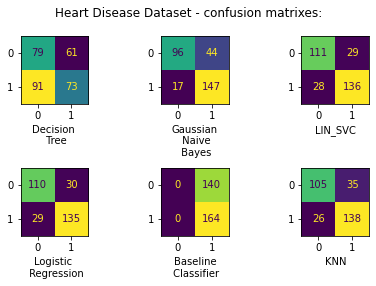

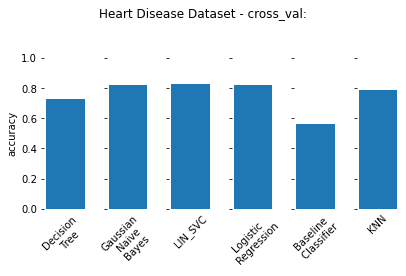

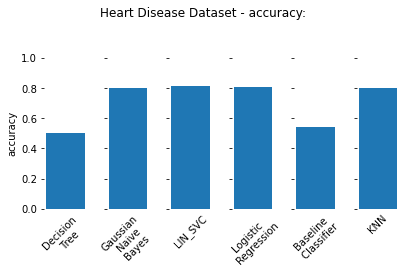

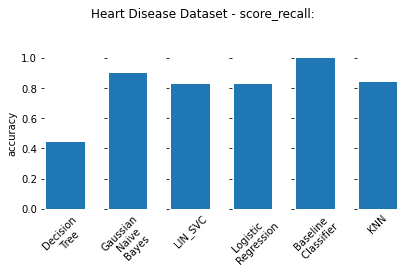

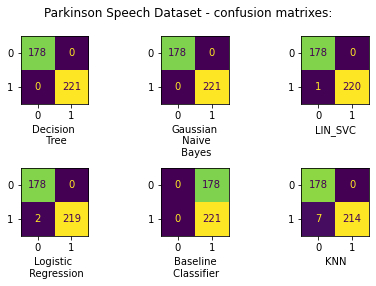

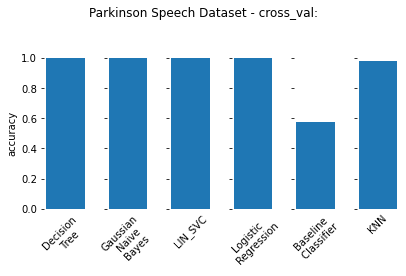

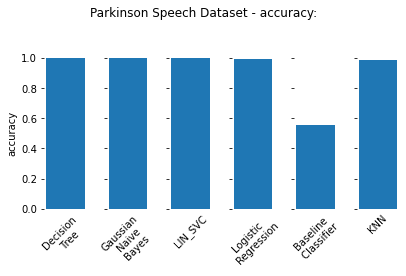

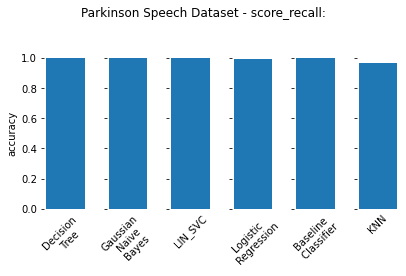

In [4]:

from knn import kNN

from sklearn.neighbors import KNeighborsClassifier
from dataset import Dataset
from config_reader import ConfigReader
from sklearn.dummy import DummyClassifier
from simple_baseline_classifier import SimpleBaselineClassifier


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, recall_score
from matplotlib import pyplot
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from typing import Union




#load in datasets
_config_reader_heart = ConfigReader.read_json_config("./config_heart_disease.json")
_config_reader_parkinson = ConfigReader.read_json_config("./config_parkinson_sound_recording.json")
datasets = list()
datasets.append(Dataset(_config_reader_heart))
datasets.append(Dataset(_config_reader_parkinson))


my_random_state = random_state=datasets[0]._random_state_for_split
my_test_size = random_state=datasets[0]._test_size




print("Now do the classification experiments....")


#extend classes with get_params
class Ext_SimpleBaselineClassifier(SimpleBaselineClassifier):
    def __init__(self, random_state : int = None, constant : Union[int,str] = None,\
        strategy : str = "most_frequent" ) -> None:
        self._random_state = random_state
        self._constant = constant
        self._strategy = strategy
        super().__init__(random_state,constant,strategy)
    def get_params(self,deep = False):
        ret = dict()
        ret["random_state"] = self._random_state
        ret["constant"] = self._constant
        ret["strategy"] = self._strategy
        return ret

class Ext_kNN(kNN):
    def __init__(self, n_neighbors:int, metric:str = "cosine"):
        self.n_neighbors = n_neighbors
        self.metric = metric
        super().__init__(n_neighbors,metric)
    def get_params(self,deep = False):
        ret = dict()
        ret["n_neighbors"] = self.n_neighbors
        ret["metric"] = self.metric
      
        return ret


#for every dataset 
for dataset in datasets:
    #split
    x_train, y_train, x_test, y_test = dataset.split_data("mean")

    #now scale
    scaler = MinMaxScaler(feature_range=(0, 1))

    x_test = scaler.fit_transform(x_test)
    x_train = scaler.fit_transform(x_train)

    #classify all data here

    results = []
    recall = []
    names = []
    accuracies = []
    models = []
    confusions = []

    models.append(('Decision \n Tree', DecisionTreeClassifier(random_state=my_random_state)))
    models.append(('Gaussian\n Naive\n Bayes', GaussianNB()))
    models.append(('LIN_SVC', LinearSVC(random_state=my_random_state,dual= False)))
    models.append(('Logistic \n Regression', LogisticRegression(random_state=my_random_state)))
    models.append(('Baseline\n Classifier', \
     Ext_SimpleBaselineClassifier(random_state=my_random_state)))
    models.append(('KNN', Ext_kNN(n_neighbors = 5)))
   
    
    for name,model in models:
       
        names.append(name)
        
        #make cross validation 
        kfold = KFold(n_splits=10, shuffle=True, random_state=my_random_state)
        cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results.mean())
        
        #fit and predict
        model.fit(x_train,y_train)
        predict = model.predict(x_test)
        
        #accuracies  
        accuracies.append(accuracy_score(y_test, predict))
        #confusion matrix
        confusions.append((y_test,predict))
        #recall score
        recall.append(recall_score(y_test,predict))
        
    #plot confusion matrixes
    fig, [ax_l,ax_t] = pyplot.subplots(2,int(len(models)/2))
    cnt = 0

    fig.suptitle(f"{dataset.name} - confusion matrixes:")

    for y_test, predict in confusions:
  
        cm = confusion_matrix(y_test, predict)

        if (cnt <3):

            cm_display = ConfusionMatrixDisplay(cm).plot(ax = ax_l[cnt],colorbar = False )
            ax_l[cnt].set_xlabel(names[cnt])
            ax_l[cnt].set_ylabel("")
        elif (cnt <6):
            cm_display = ConfusionMatrixDisplay(cm).plot(ax = ax_t[cnt-3],colorbar = False )
            ax_t[cnt-3].set_xlabel(names[cnt])
            ax_t[cnt-3].set_ylabel("")
        cnt += 1
    fig.figsize = [18,12]
    fig.tight_layout()
    
    #prepare all bar charts
    charts = []
    charts.append(["cross_val","accuracy",results])
    charts.append(["accuracy","accuracy",accuracies])
    charts.append(["score_recall","accuracy",recall])
    
    
      #plot barcharts
    
    for name, y_label, data in charts:
        
        fig, ax = pyplot.subplots(1,len(models),sharey=True)
        cnt = 0

        fig.suptitle(f"{dataset.name} - {name}:")


        for datapoint in data:
            if cnt == 0:
                ax[cnt].set_ylabel(y_label)
            ax[cnt].set_title("")
            ax[cnt].set_xlabel(names[cnt],rotation = 45)
            ax[cnt].bar(x=cnt, height=datapoint, width=0.4)
            ax[cnt].set_ylim(top = 1.0)
            ax[cnt].set_frame_on(False)
            ax[cnt].tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False) # labels along the bottom edge are off
            cnt += 1
        fig.tight_layout(pad=2.0)
        fig.frameon = False
        fig.figsize = [10,7]


In [12]:
from sklearn import datasets as data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import accuracy_score
from knn import kNN
print("The kNN classifier:")

dataset = data.load_iris()
X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

refCosine = KNeighborsClassifier(n_neighbors=3, metric="cosine")
knnCosine = kNN(5)
refEuclid = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knnEuclid = kNN(5,"euclidean")
refCheby = KNeighborsClassifier(n_neighbors=5, metric="chebyshev")
knnCheby = kNN(5,"chebyshev")
refMan = KNeighborsClassifier(n_neighbors=5, metric="manhattan")
knnMan = kNN(5,"manhattan")

print(knnCosine)
print(knnEuclid)
print(knnCheby)
print(knnMan)
print("")

refCosine.fit(X_train,y_train)
knnCosine.fit(X_train,y_train)
refEuclid.fit(X_train,y_train)
knnEuclid.fit(X_train,y_train)
refCheby.fit(X_train,y_train)
knnCheby.fit(X_train,y_train)
refMan.fit(X_train,y_train)
knnMan.fit(X_train,y_train)

print(f"Cosine metric:{os.linesep}")
print("Own implementation:")
testCOwn = knnCosine.predict(X_test)
print(testCOwn)
print("Reference:")
testCRef = refCosine.predict(X_test)
print(testCRef)
print(f"Accuracy own: {accuracy_score(y_test,testCOwn)}, Accuracy reference: {accuracy_score(y_test,testCRef)}{os.linesep}")

print(f"Euclidean metric:{os.linesep}")
print("Own implementation:")
testEOwn = knnEuclid.predict(X_test)
print(testEOwn)
print("Reference:")
testERef = refEuclid.predict(X_test)
print(testERef)
print(f"Accuracy own: {accuracy_score(y_test,testEOwn)}, Accuracy reference: {accuracy_score(y_test,testERef)}{os.linesep}")

print(f"Chebyshev metric:{os.linesep}")
print("Own implementation:")
testChOwn = knnCheby.predict(X_test)
print(testChOwn)
print("Reference:")
testChRef = refCheby.predict(X_test)
print(testChRef)
print(f"Accuracy own: {accuracy_score(y_test,testChOwn)}, Accuracy reference: {accuracy_score(y_test,testChRef)}{os.linesep}")

print(f"Manhattan metric:{os.linesep}")
print("Own implementation:")
testMOwn = knnMan.predict(X_test)
print(testMOwn)
print("Reference:")
testMRef = refMan.predict(X_test)
print(testMRef)
print(f"Accuracy own: {accuracy_score(y_test,testMOwn)}, Accuracy reference: {accuracy_score(y_test,testMRef)}{os.linesep}")


The kNN classifier:
kNN(n_neighbors=5 metric=cosine)
kNN(n_neighbors=5 metric=euclidean)
kNN(n_neighbors=5 metric=chebyshev)
kNN(n_neighbors=5 metric=manhattan)

Cosine metric:

Own implementation:
[0 0 2 2 1 0 0 1 2 0 0 2 1 1 2 1 0 2 1 2 0 0 0 1 0 1 0 2 2 1 1 2 2 1 2 0 0
 0 2 0 1 0 2 0 0]
Reference:
[0 0 2 2 1 0 0 1 2 0 0 2 1 1 2 1 0 2 1 2 0 0 0 1 0 1 0 2 2 1 1 2 2 1 1 0 0
 0 2 0 1 0 2 0 0]
Accuracy Own:0.9777777777777777, Accuracy Reference:1.0

Euclidean metric:

Own implementation:
[0 0 2 2 1 0 0 1 1 0 0 2 1 1 2 1 0 2 1 2 0 0 0 1 0 1 0 2 2 1 1 2 2 1 1 0 0
 0 2 0 1 0 2 0 0]
Reference:
[0 0 2 2 1 0 0 1 1 0 0 2 1 1 2 1 0 2 1 2 0 0 0 1 0 1 0 2 2 1 1 2 2 1 1 0 0
 0 2 0 1 0 2 0 0]
Accuracy Own:0.9777777777777777, Accuracy Reference:0.9777777777777777

Chebyshev metric:

Own implementation:
[0 0 2 2 1 0 0 1 2 0 0 2 1 1 2 1 0 2 1 2 0 0 0 1 0 1 0 2 2 1 1 2 2 1 1 0 0
 0 2 0 1 0 2 0 0]
Reference:
[0 0 2 2 1 0 0 1 2 0 0 2 1 1 2 1 0 2 1 2 0 0 0 1 0 1 0 2 2 1 1 2 2 1 1 0 0
 0 2 0 1 0 2 0 0]
Accu

In [1]:
from kmeans import KMeans as Kmeans
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import datasets as data

dataset = data.load_iris()
X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)



kmeansOwn = Kmeans()
kmeansRef = KMeans()

print(f"{kmeansOwn}\n")

kmeansOwn.fit(X_train)
kmeansRef.fit(X_train)

print(f"own: {kmeansOwn.predict(X_test)}\n")
print(f"ref: {kmeansRef.predict(X_test)}")


KMeans(n_clusters=8, max_iter=300, tol=0.0001, random_state=None)

own: [2 3 3 5 0 5 5 5 1 5 7 2 1 3 2 3 0 2 0 3 0 3 2 7 1 5 3 0 0 0 2 3 2 3 7 1 3
 2 4 0 5 1 5 0 5]

ref: [3 7 7 1 6 1 1 1 0 1 5 0 0 4 3 4 6 3 6 4 6 7 0 5 0 1 7 6 6 6 0 7 3 7 5 0 4
 5 2 6 1 0 1 6 1]
